In [1]:
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import sqlalchemy as sal

In [2]:
endpoint = 'capstone.clihskgj8i7s.us-west-2.rds.amazonaws.com'
user = 'group3'
db = 'db1'
pw = '3qLXGOaxMSoqYfj3yAOY'
engine = sal.create_engine('postgresql://%s:%s@%s/%s' % (user, pw, endpoint, db))

In [3]:
query="""
select timestamp, station, total_flow, avg_speed
from traffic_train
;
"""

traffic = pd.read_sql(query, engine)
traffic

,timestamp,station,total_flow,avg_speed
0,2020-04-22 13:20:00,404434,141.0,66.3
1,2020-04-22 13:20:00,404435,137.0,65.9
2,2020-04-22 13:20:00,404444,151.0,65.6
3,2020-04-22 13:20:00,404451,180.0,61.3
4,2020-04-22 13:20:00,404452,92.0,68.1
...,...,...,...,...
16673259,2020-04-22 13:20:00,403409,256.0,68.6
16673260,2020-04-22 13:20:00,403412,212.0,65.0
16673261,2020-04-22 13:20:00,403414,192.0,67.9
16673262,2020-04-22 13:20:00,403419,227.0,65.6


In [4]:
traffic['timestamp'] = pd.to_datetime(traffic['timestamp'])
traffic['Month'] = pd.DatetimeIndex(traffic['timestamp']).month
traffic['Day'] = pd.DatetimeIndex(traffic['timestamp']).day
traffic['Year'] = pd.DatetimeIndex(traffic['timestamp']).year
traffic['Date'] = traffic['timestamp'].dt.date
traffic['Time'] = traffic['timestamp'].dt.time
traffic

,timestamp,station,total_flow,avg_speed,Month,Day,Year,Date,Time
0,2020-04-22 13:20:00,404434,141.0,66.3,4,22,2020,2020-04-22,13:20:00
1,2020-04-22 13:20:00,404435,137.0,65.9,4,22,2020,2020-04-22,13:20:00
2,2020-04-22 13:20:00,404444,151.0,65.6,4,22,2020,2020-04-22,13:20:00
3,2020-04-22 13:20:00,404451,180.0,61.3,4,22,2020,2020-04-22,13:20:00
4,2020-04-22 13:20:00,404452,92.0,68.1,4,22,2020,2020-04-22,13:20:00
...,...,...,...,...,...,...,...,...,...
16673259,2020-04-22 13:20:00,403409,256.0,68.6,4,22,2020,2020-04-22,13:20:00
16673260,2020-04-22 13:20:00,403412,212.0,65.0,4,22,2020,2020-04-22,13:20:00
16673261,2020-04-22 13:20:00,403414,192.0,67.9,4,22,2020,2020-04-22,13:20:00
16673262,2020-04-22 13:20:00,403419,227.0,65.6,4,22,2020,2020-04-22,13:20:00


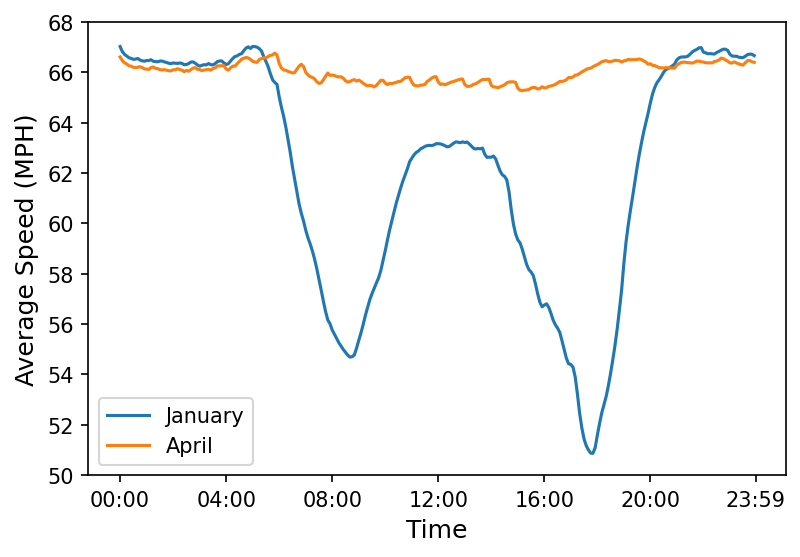

In [5]:
plt.figure(dpi=150)
traffic[traffic.Month==1].groupby('Time')['avg_speed'].mean().plot()
traffic[traffic.Month==4].groupby('Time')['avg_speed'].mean().plot()
plt.xlabel('Time', fontsize=12)
plt.ylabel('Average Speed (MPH)', fontsize=12)
plt.xticks([datetime.time(x) for x in range(0,24,4)] + [datetime.time(23, 59)])
plt.ylim([50, 68])
plt.legend(['January', 'April'])
plt.savefig('traffic_speed', bbox_inches='tight', dpi=400)

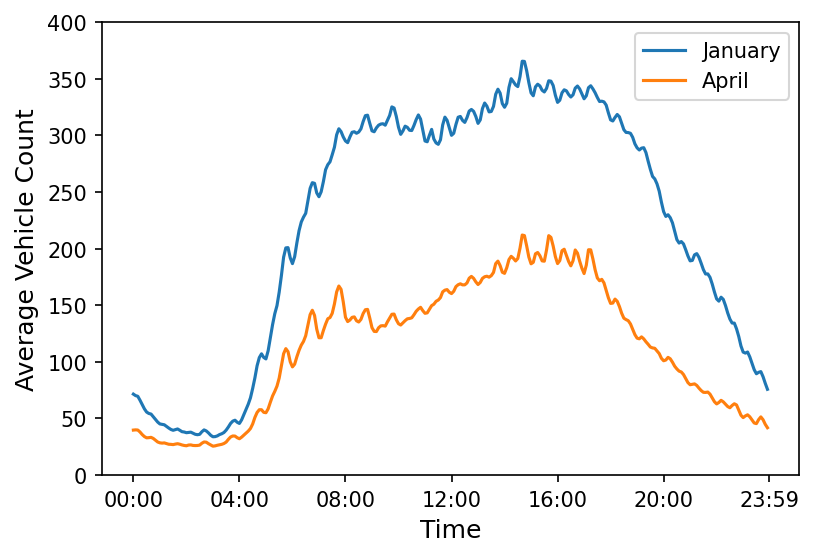

In [6]:
plt.figure(dpi=150)
traffic[traffic.Month==1].groupby('Time')['total_flow'].mean().plot()
traffic[traffic.Month==4].groupby('Time')['total_flow'].mean().plot()
plt.xlabel('Time', fontsize=12)
plt.ylabel('Average Vehicle Count', fontsize=12)
plt.xticks([datetime.time(x) for x in range(0,24,4)] + [datetime.time(23, 59)])
plt.ylim([0, 400])
plt.legend(['January', 'April'])
plt.savefig('traffic_flow', bbox_inches='tight', dpi=400)

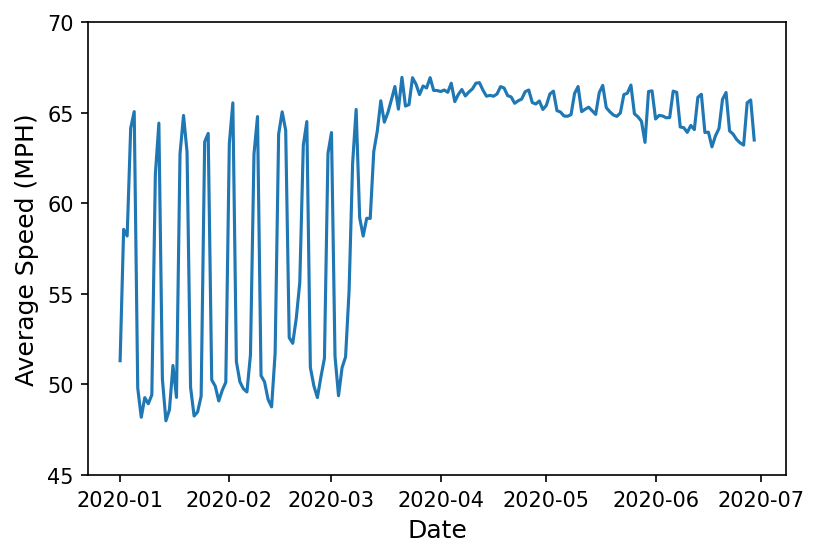

In [7]:
plt.figure(dpi=150)
rush_hour = traffic[(traffic.Time>=datetime.time(16)) & (traffic.Time<=datetime.time(19))]
rush_hour = rush_hour.groupby('Date')['avg_speed'].mean()
rush_hour.plot()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Speed (MPH)', fontsize=12)
plt.ylim([45, 70])
plt.savefig('traffic_speed_day', bbox_inches='tight', dpi=400)

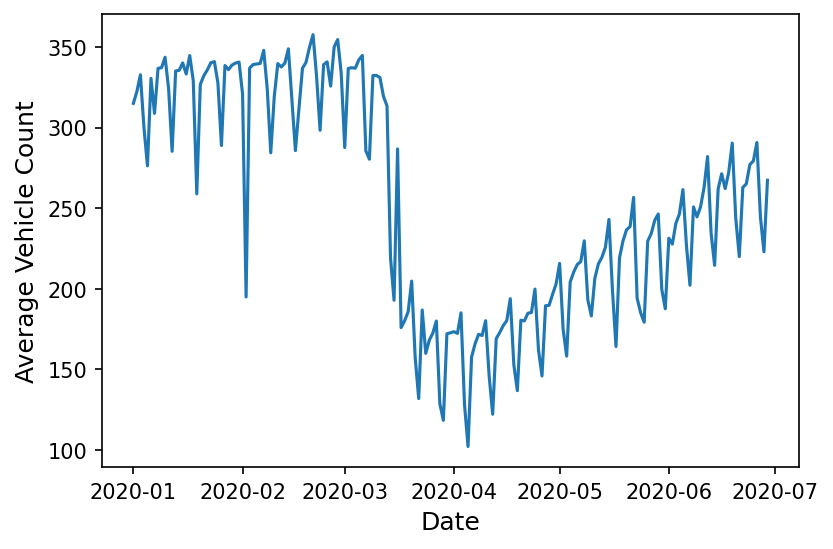

In [8]:
plt.figure(dpi=150)
rush_hour = traffic[(traffic.Time>=datetime.time(16)) & (traffic.Time<=datetime.time(19))]
rush_hour = rush_hour.groupby('Date')['total_flow'].mean()
rush_hour.plot()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Vehicle Count', fontsize=12)
plt.savefig('traffic_flow_day', bbox_inches='tight', dpi=400)